In [1]:
%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np
import matplotlib.pyplot as plt

LOG.propagate = False

In [2]:
# Get ArtemisBLEController object
ble = get_ble_controller()

# Connect to the Artemis Device
ble.connect()

2023-03-25 02:57:28,996 | INFO     |: Looking for Artemis Nano Peripheral Device: C0:83:b1:6a:38:3C
2023-03-25 02:57:31,737 | INFO     |: Connected to C0:83:b1:6a:38:3C


D:\Workspace\ECE-5160-Sp23\ble_robot-1.1\ble_python\base_ble.py:87: FutureWarning: This method will be removed future version, pass the callback to the BleakClient constructor instead.
  self.client.set_disconnected_callback(self.disconnect_handler)


In [3]:
def get_data_cb(uuid, byte_array):
    global tof_list, pwm_list
    if byte_array is not None:
        s = byte_array.decode("utf-8")
        s = s.split("|")  # split each reading
        
        if s[0] == 'T':
            # TOF
            readings = s[1].split(',')[:-1]
            for data in readings:
                data = data.split('&')
                time = int(data[0])
                tof  = int(data[1])
                if tof > 0:
                    tof_time_list.append(time)
                    tof_data_list.append(tof)
        else:
            # PWM
            readings = s[1].split(',')[:-1]
            for data in readings:
                data = data.split('&')
                time = int(data[0])
                pwm  = int(data[1])
                if pwm > 0:
                    pwm_time_list.append(time)
                    pwm_data_list.append(pwm)

In [4]:
ble.start_notify(ble.uuid['RX_STRING'], get_data_cb)

In [5]:
tof_data_list = []
pwm_data_list = []
tof_time_list = []
pwm_time_list = []


In [15]:
# start
ble.send_command(CMD.SEND_TWO_INTS, "")

In [16]:
# stop
ble.send_command(CMD.SEND_THREE_FLOATS, "")

In [10]:
ble.stop_notify(ble.uuid['RX_STRING'])

In [17]:
tof_time_list = [x - tof_time_list[0] for x in tof_time_list]
pwm_time_list = [x - pwm_time_list[0] for x in pwm_time_list]

In [18]:
print(tof_data_list)
print(pwm_data_list)

[1079, 1080, 1080, 1077, 1072, 1064, 1052, 1044, 1027, 1015, 993, 971, 941, 911, 885, 852, 819, 787, 758, 728, 691, 660, 629, 596, 563, 532, 505, 477, 449, 427, 404, 384, 365, 345, 328, 311, 298, 284, 277, 269, 268, 267, 267, 269, 268, 268, 266, 267, 267, 268, 270, 268, 267, 266, 267, 267, 268, 268, 267, 268, 265, 268, 267, 268, 267, 269]
[60, 72, 73, 73, 72, 71, 69, 67, 69, 64, 66, 60, 60, 53, 52, 53, 48, 45, 44, 45, 43, 36, 39, 37, 34, 33, 30, 33, 30, 28, 31, 29, 29, 29, 27, 28, 27, 28, 27, 30, 29, 32, 32, 33, 34, 32, 33, 32, 33, 33, 33, 33, 31, 32, 32, 33, 32, 33, 32, 32, 33, 31, 34, 32, 33, 32]


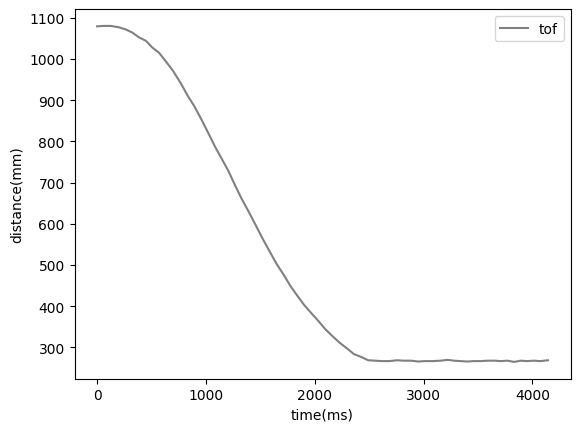

In [19]:
plt.plot(tof_time_list, tof_data_list, color='gray', label='tof')
plt.legend(loc="upper right")
plt.xlabel('time(ms)')
plt.ylabel('distance(mm)')
plt.show()

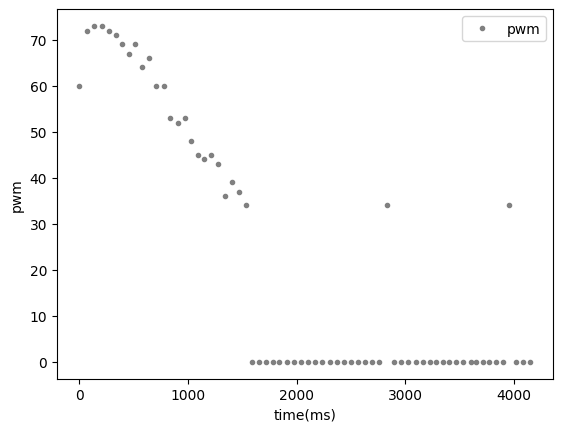

In [34]:
plt.plot(pwm_time_list, pwm_data_list, '.', color='gray', label='pwm')
plt.legend(loc="upper right")
plt.xlabel('time(ms)')
plt.ylabel('pwm')
plt.show()

In [33]:
for idx, num in enumerate(pwm_data_list):
    if num < 34:
        pwm_data_list[idx] = 0

In [27]:
with open('pwm_data_run.pkl', 'rb') as f:
    pwm_data_list = pickle.load(f)

In [35]:


file = open('tof_data_run.pkl', 'wb')
pickle.dump(tof_data_list, file)
file.close()
file = open('tof_time_run.pkl', 'wb')
pickle.dump(tof_time_list, file)
file.close()
file = open('pwm_data_run.pkl', 'wb')
pickle.dump(pwm_data_list, file)
file.close()

In [ ]:
# Disconnect
ble.disconnect()